In [1]:
import nltk
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import bokeh
import matplotlib.pyplot as plt
import pylab as pl
import string

In [2]:
import os

In [3]:
DATA_MAG = "/Users/pnguyen/Documents/DaVinci/Data/wine-reviews/winemag-data-130k-v2.csv"

In [4]:
df = pd.read_csv(DATA_MAG, index_col=0)

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1df61940>]],
      dtype=object)

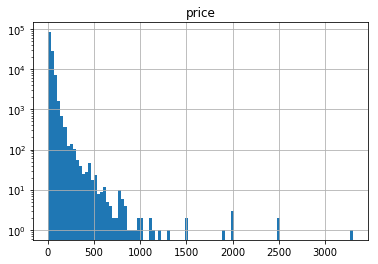

In [6]:
df.hist(column = 'price', bins=100, log=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ec39898>]],
      dtype=object)

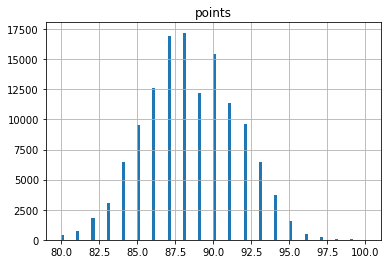

In [7]:
df.hist(column = 'points', bins=100)

In [8]:
df['unique_taster'] = df['taster_name'] + df['taster_twitter_handle'].fillna('__notwitter')

In [9]:
df['unique_taster'].value_counts()

Roger Voss@vossroger                25514
Michael Schachner@wineschach        15134
Kerin O’Keefe@kerinokeefe           10776
Virginie Boone@vboone                9537
Paul Gregutt@paulgwine               9532
Matt Kettmann@mattkettmann           6332
Joe Czerwinski@JoeCz                 5147
Sean P. Sullivan@wawinereport        4966
Anna Lee C. Iijima__notwitter        4415
Jim Gordon@gordone_cellars           4177
Anne Krebiehl MW@AnneInVino          3685
Lauren Buzzeo@laurbuzz               1835
Susan Kostrzewa@suskostrzewa         1085
Mike DeSimone@worldwineguys           514
Jeff Jenssen@worldwineguys            491
Alexander Peartree__notwitter         415
Carrie Dykes__notwitter               139
Fiona Adams@bkfiona                    27
Christina Pickard@winewchristina        6
Name: unique_taster, dtype: int64

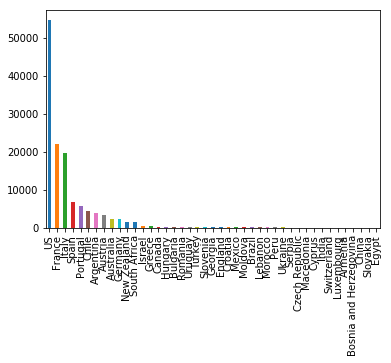

In [10]:
fig, ax = plt.subplots()
df['country'].value_counts().plot(ax=ax, kind='bar')

A few countries makes up for most of the wines

279.48470588235296

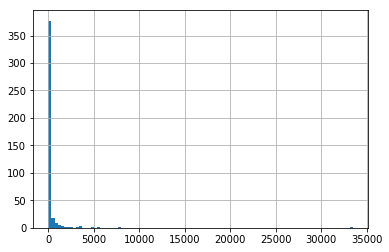

In [11]:
df.groupby(by='province')['title'].nunique().hist(bins=100)
df.groupby(by='province')['title'].nunique().mean() #number of wines per province on average

In [12]:
df['province'].value_counts()[:10]

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64

The average (mean) province contributes about 300 wines to the list. But obviously some provinces dominate.

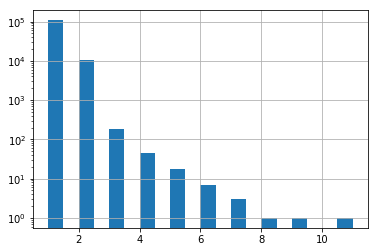

In [13]:
df['title'].value_counts().hist(bins=20, log=True)

Most wines appear only once, but seems like a few appears multiple times

In [14]:
df.groupby(by='country')['designation'].value_counts().nlargest(20)

country    designation    
US         Reserve            1485
           Estate             1210
Italy      Riserva             690
US         Estate Grown        600
Chile      Reserva             520
France     Barrel sample       375
Spain      Crianza             343
US         Dry                 326
France     Vieilles Vignes     301
Spain      Reserva             270
France     Barrel Sample       252
US         Estate Bottled      252
Portugal   Reserva             226
Argentina  Reserva             224
France     Tradition           221
Italy      Brut                186
US         Old Vine            185
Italy      Extra Dry           180
US         Rosé of             169
France     Brut Rosé           165
Name: designation, dtype: int64

In [15]:
top_grape_country = df.groupby(by='country')['variety'].value_counts().nlargest(300).to_frame('count').reset_index()
top_grape_country

,country,variety,count
0,US,Pinot Noir,9885
1,US,Cabernet Sauvignon,7315
2,US,Chardonnay,6801
3,France,Bordeaux-style Red Blend,4725
4,Italy,Red Blend,3624
5,US,Syrah,3244
6,US,Red Blend,2972
7,France,Chardonnay,2808
8,Italy,Nebbiolo,2736
9,US,Zinfandel,2711


In [16]:
for i in range(5):
    print(df['description'][i])
    print('\n')

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.


This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.


Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.


Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.


Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, i

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
print(nltk.corpus.stopwords.words('english')[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [19]:
remove = set(nltk.corpus.stopwords.words('english') + [p for p in string.punctuation])
#use set to improve performance

def clean_tokenize(text):
    """Turn long text into lowercase tokens, remove punctuations & stopwords
    e.g: Aromas include tropical fruit, broom, brimstone and dried herb.-->
    ['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone',
    'dried', 'herb']"""
    tokens = nltk.tokenize.word_tokenize(text.lower())
    
    clean_tokens = (t for t in tokens if not t in remove)
    
    return list(clean_tokens)

In [20]:
%%timeit
df['tokenized_desc'] = df['description'].apply(clean_tokenize)
#takes a long time! Don't re-run

KeyboardInterrupt: 

In [ ]:
top = df[df['country'].isin(top_grape_country['country']) & df['variety'].isin(top_grape_country['variety'])]
# remember to use & not 'and'. The latter will try to compare Series --> ambiguous truth value

In [ ]:
len(top)/len(df)

In [ ]:
len(df.groupby(by='country')['variety'].value_counts())

Picking out the top 300 most common grapes + country combination out of 1612 possible values still leaves us with 96% of the bottles.

In [ ]:
doc = df['tokenized_desc'].sum()